In [1]:
import tensorflow as tf
import pandas as pd
import os
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# JANGAN RUN KODE INI ! KECUALI ANDA MENGGUNAKAN GPU

# Membatasi alokasi memori GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Hanya mengalokasikan memori yang diperlukan
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)  

In [3]:
data = pd.read_csv('final_balance_dataset.csv')
data

,Timestamp,Email Address,Nama,Usia (Contoh: 18),Jenis Kelamin,Status Pekerjaan,Saya menyatakan bersedia secara sukarela untuk berpartisipasi pada penelitian ini dengan mengisi kuesioner selama kurang lebih 20-30 menit tanpa paksaan dari pihak manapun. Saya sepenuhnya memahami apa yang telah disampaikan serta apa yang diharapkan dari saya selaku partisipan penelitian. Saya berhak untuk berhenti mengisi kuesioner ini kapan saja tanpa perlu memberikan penjelasan. Saya memberikan izin untuk menggunakan data yang saya berikan hanya untuk kepentingan penelitian ini. Saya telah memahami bahwa informasi yang diperoleh dari penelitian ini sepenuhnya rahasia dan hanya digunakan untuk kepentingan ilmiah,Menjadi marah karena hal-hal kecil/sepele,Mulut terasa kering,Tidak dapat melihat hal yang positif dari suatu\nkejadian,...,Merasa tidak berharga,Tidak dapat memaklumi hal apapun yang\nmenghalangi anda untuk menyelesaikan hal yang\nsedang Anda lakukan,Merasa ketakutan,Merasa tidak ada harapan untuk masa depan,Merasa hidup tidak berarti,Mudah gelisah,Khawatir dengan situasi saat diri Anda mungkin\nmenjadi panik dan mempermalukan diri sendiri,Gemetar,Sulit untuk meningkatkan inisiatif dalam melakukan\nsesuatu,Apakah anda sudah yakin dengan seluruh pertanyaan anda?
0,11/11/2024 20:01:37,igustisuryaadwn@gmail.com,I Gusti Agung Surya Adhiwinata,19,Laki-Laki,Pelajar,"Ya, Saya bersedia",2,2,0,...,1,0,1,0,0,1,0,1,1,"Ya, yakin"
1,11/11/2024 20:02:31,fredyaryanta@gmail.com,I Nyoman Fredy Aryanta,48,Laki-Laki,Bekerja,"Ya, Saya bersedia",2,2,0,...,0,0,0,0,0,0,0,0,0,"Ya, yakin"
2,11/11/2024 20:07:00,pandddeputra12@gmail.com,I Putu Pande Surya Putra,19,Laki-Laki,Pelajar,"Ya, Saya bersedia",1,2,0,...,0,0,0,0,0,0,1,0,2,"Ya, yakin"
3,11/11/2024 20:08:41,adihazel8@gmail.com,I Made Adi Hazel Nagata,16,Laki-Laki,Pelajar,"Ya, Saya bersedia",1,1,1,...,0,2,0,0,0,0,0,0,1,"Ya, yakin"
4,11/11/2024 20:11:10,niputuadelia0303@gmail.com,Ni Putu Adelia Candra Swari,20,Perempuan,Pelajar,"Ya, Saya bersedia",1,2,0,...,0,0,0,0,0,1,0,1,1,"Ya, yakin"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,30/09/2024 04:43:20,agus.hermanto94@gmail.com,Agus Hermanto,34,perempuan,bekerja,"Ya, Saya bersedia",3,3,3,...,3,3,3,3,3,3,3,3,3,"Ya, yakin"
732,22/11/2024 20:49:39,siska.maharani86@yahoo.com,Siska Maharani,20,laki-laki,pelajar,"Ya, Saya bersedia",3,3,3,...,3,3,3,3,3,3,3,3,3,"Ya, yakin"
733,16/02/2024 05:55:53,rahmat.hidayat92@outlook.com,Rahmat Hidayat,42,laki-laki,bekerja,"Ya, Saya bersedia",3,3,3,...,3,3,3,3,3,3,3,3,3,"Ya, yakin"
734,19/05/2024 17:32:19,mega.pratiwi95@gmail.com,Mega Pratiwi,30,laki-laki,pelajar,"Ya, Saya bersedia",3,3,3,...,3,3,3,3,3,3,3,3,3,"Ya, yakin"


In [4]:
data.shape

(736, 48)

In [5]:
# delete useless column
data.drop(data.iloc[:,:3],axis=1,inplace=True)
data.drop(data.iloc[:,3:4],axis=1,inplace=True)
data.drop(data.columns[-1],axis=1,inplace=True)
data.head(3)

,Usia (Contoh: 18),Jenis Kelamin,Status Pekerjaan,Menjadi marah karena hal-hal kecil/sepele,Mulut terasa kering,Tidak dapat melihat hal yang positif dari suatu\nkejadian,"Merasakan gangguan dalam bernapas (napas cepat,\nsulit bernapas)",Merasa sepertinya tidak kuat lagi untuk melakukan\nsuatu kegiatan,Cenderung bereaksi berlebihan pada situasi,Kelemahan pada anggota tubuh,...,Berada pada keadaan tegang,Merasa tidak berharga,Tidak dapat memaklumi hal apapun yang\nmenghalangi anda untuk menyelesaikan hal yang\nsedang Anda lakukan,Merasa ketakutan,Merasa tidak ada harapan untuk masa depan,Merasa hidup tidak berarti,Mudah gelisah,Khawatir dengan situasi saat diri Anda mungkin\nmenjadi panik dan mempermalukan diri sendiri,Gemetar,Sulit untuk meningkatkan inisiatif dalam melakukan\nsesuatu
0,19,Laki-Laki,Pelajar,2,2,0,0,1,1,0,...,1,1,0,1,0,0,1,0,1,1
1,48,Laki-Laki,Bekerja,2,2,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,19,Laki-Laki,Pelajar,1,2,0,0,1,2,0,...,2,0,0,0,0,0,0,1,0,2


In [6]:
# DISPLAY LABEL IN CATEGORICAL COLUMNS
data['Jenis Kelamin'].unique()  ,  data['Status Pekerjaan'].unique()

(array(['Laki-Laki', 'Perempuan', 'perempuan', 'laki-laki'], dtype=object),
 array(['Pelajar', 'Bekerja', 'bekerja', 'pelajar'], dtype=object))

In [7]:
#LABEL ENCODING

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# REPLACE LABEL JENIS KELAMIN
data['Jenis Kelamin'] = data['Jenis Kelamin'].replace(to_replace='laki-laki', value='Laki-Laki')
data['Jenis Kelamin'] = data['Jenis Kelamin'].replace(to_replace='perempuan', value='Perempuan')

# REPLACE LABEL STATUS PEKERJAAN
data['Status Pekerjaan'] = data['Status Pekerjaan'].replace(to_replace = 'bekerja',value= 'Bekerja')
data['Status Pekerjaan'] = data['Status Pekerjaan'].replace(to_replace = 'pelajar',value= 'Pelajar')

data['Jenis Kelamin'] = label_encoder.fit_transform(data['Jenis Kelamin'])
data['Status Pekerjaan'] = label_encoder.fit_transform(data['Status Pekerjaan'])

data.head(4)

,Usia (Contoh: 18),Jenis Kelamin,Status Pekerjaan,Menjadi marah karena hal-hal kecil/sepele,Mulut terasa kering,Tidak dapat melihat hal yang positif dari suatu\nkejadian,"Merasakan gangguan dalam bernapas (napas cepat,\nsulit bernapas)",Merasa sepertinya tidak kuat lagi untuk melakukan\nsuatu kegiatan,Cenderung bereaksi berlebihan pada situasi,Kelemahan pada anggota tubuh,...,Berada pada keadaan tegang,Merasa tidak berharga,Tidak dapat memaklumi hal apapun yang\nmenghalangi anda untuk menyelesaikan hal yang\nsedang Anda lakukan,Merasa ketakutan,Merasa tidak ada harapan untuk masa depan,Merasa hidup tidak berarti,Mudah gelisah,Khawatir dengan situasi saat diri Anda mungkin\nmenjadi panik dan mempermalukan diri sendiri,Gemetar,Sulit untuk meningkatkan inisiatif dalam melakukan\nsesuatu
0,19,0,1,2,2,0,0,1,1,0,...,1,1,0,1,0,0,1,0,1,1
1,48,0,0,2,2,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,19,0,1,1,2,0,0,1,2,0,...,2,0,0,0,0,0,0,1,0,2
3,16,0,1,1,1,1,0,1,1,1,...,0,0,2,0,0,0,0,0,0,1


In [8]:
# CHECK CATEGORIES AFTER ENCODED
data['Jenis Kelamin'].unique()   ,   data['Status Pekerjaan'].unique()

(array([0, 1]), array([1, 0]))

In [9]:
# NORMALIZATION

#MENGUBAH NAMA KOLOM USIA
data = data.rename(mapper = {'Usia (Contoh: 18)':'Usia'},axis=1)

from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

data['Usia'] = minmax.fit_transform(data[['Usia']])
data.head(4)

,Usia,Jenis Kelamin,Status Pekerjaan,Menjadi marah karena hal-hal kecil/sepele,Mulut terasa kering,Tidak dapat melihat hal yang positif dari suatu\nkejadian,"Merasakan gangguan dalam bernapas (napas cepat,\nsulit bernapas)",Merasa sepertinya tidak kuat lagi untuk melakukan\nsuatu kegiatan,Cenderung bereaksi berlebihan pada situasi,Kelemahan pada anggota tubuh,...,Berada pada keadaan tegang,Merasa tidak berharga,Tidak dapat memaklumi hal apapun yang\nmenghalangi anda untuk menyelesaikan hal yang\nsedang Anda lakukan,Merasa ketakutan,Merasa tidak ada harapan untuk masa depan,Merasa hidup tidak berarti,Mudah gelisah,Khawatir dengan situasi saat diri Anda mungkin\nmenjadi panik dan mempermalukan diri sendiri,Gemetar,Sulit untuk meningkatkan inisiatif dalam melakukan\nsesuatu
0,0.204545,0,1,2,2,0,0,1,1,0,...,1,1,0,1,0,0,1,0,1,1
1,0.863636,0,0,2,2,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0.204545,0,1,1,2,0,0,1,2,0,...,2,0,0,0,0,0,0,1,0,2
3,0.136364,0,1,1,1,1,0,1,1,1,...,0,0,2,0,0,0,0,0,0,1


In [10]:
# CREATE DATAFRAME FROM EACH OUTPUT

depresi_cols = [0, 1, 2, 5, 7, 12, 15, 18, 19, 23, 26, 28, 32, 33, 34, 36, 39]
kecemasan_cols = [0, 1, 2, 4, 6, 9, 11, 17, 21, 22, 25, 27, 29, 32, 33, 38, 39]
stres_cols = [0, 1, 2, 3, 8, 10, 13, 14, 16, 20, 24, 29, 31, 34, 35, 37, 39]

# CREATE NEW DATAFRAME FOR DEPRESI OUTPUT
data_depresi = data.iloc[:,depresi_cols]  # DEEP COPY column yg termasuk depresi
data_depresi.loc[:,'skor_depresi'] = 0    # BUAT KOLOM BARU DAN INISIALISASI DGN NILAI 0
data_depresi.loc[:,'skor_depresi'] = data_depresi.sum(axis=1).astype(dtype=int) #FILL skor_depresi from sum of every sample

data_kecemasan = data.iloc[:,kecemasan_cols]
data_kecemasan.loc[:,'skor_kecemasan'] = 0
data_kecemasan.loc[:,'skor_kecemasan'] = data_kecemasan.sum(axis=1).astype(dtype=int)

data_stress = data.iloc[:,stres_cols]
data_stress.loc[:,'skor_stress'] = 0
data_stress.loc[:,'skor_stress'] = data_stress.sum(axis=1).astype(dtype=int)

# CREATE A LABEL

def categorize(skor, thresholds):
        for i, threshold in enumerate(thresholds):
            if skor <= threshold:
                return i
        return len(thresholds)

depresi_thresholds = [9, 13, 20, 27]
kecemasan_thresholds = [7, 12, 18, 26]
stres_thresholds = [14, 18, 24, 29]

data_depresi['kategori_depresi'] = data_depresi['skor_depresi'].apply(lambda x: categorize(x, depresi_thresholds))
data_kecemasan['kategori_kecemasan'] = data_kecemasan['skor_kecemasan'].apply(lambda x: categorize(x, kecemasan_thresholds))
data_stress['kategori_stress'] = data_stress['skor_stress'].apply(lambda x: categorize(x, stres_thresholds))

data_depresi.describe()

C:\Users\aliff\AppData\Local\Temp\ipykernel_26660\1669895041.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_depresi.loc[:,'skor_depresi'] = 0    # BUAT KOLOM BARU DAN INISIALISASI DGN NILAI 0
C:\Users\aliff\AppData\Local\Temp\ipykernel_26660\1669895041.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kecemasan.loc[:,'skor_kecemasan'] = 0
C:\Users\aliff\AppData\Local\Temp\ipykernel_26660\1669895041.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

,Usia,Jenis Kelamin,Status Pekerjaan,Tidak dapat melihat hal yang positif dari suatu\nkejadian,Merasa sepertinya tidak kuat lagi untuk melakukan\nsuatu kegiatan,Merasa psimis dalam segala hal,Merasa sedih dan depresi,"Kehilangan minat pada banyak hal (misal: makan,\nambulasi, sosialisasi)",Merasa diri tidak layak,Merasa hidup tidak berharga,Tidak dapat menikmati hal-hal yang saya lakukan,Mudah marah,Sulit mentoleransi gangguan-gangguan terhadap hal\nyang sedang dilakukan,Berada pada keadaan tegang,Merasa tidak berharga,Merasa ketakutan,Mudah gelisah,skor_depresi,kategori_depresi
count,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000
mean,0.382998,0.467391,0.510870,1.369565,1.389946,1.423913,1.383152,1.380435,1.425272,1.335598,1.389946,1.404891,1.425272,1.384511,1.343750,1.368207,1.414402,20.418478,2.351902
std,0.226673,0.499275,0.500222,1.113601,1.104774,1.117419,1.106537,1.112378,1.111407,1.110315,1.126723,1.067352,1.106499,1.102985,1.141685,1.114662,1.131255,8.289417,1.176792
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.204545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,2.000000
50%,0.363636,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000,3.000000
75%,0.568182,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,25.000000,3.000000
max,1.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,44.000000,4.000000


In [50]:
# EXPLAINED EVERY VARIABLE WITH PCA
from sklearn.decomposition import PCA

# CHECK 10 VARIATION 
pca = PCA(n_components=10)
x_pca = pca.fit_transform(data)

variance_ratio = pca.explained_variance_ratio_

variance_ratio  , pca.components_

(array([0.24132837, 0.03240301, 0.02736129, 0.02724184, 0.02677033,
        0.02553714, 0.02501624, 0.02475791, 0.02405635, 0.02307358]),
 array([[ 1.64126732e-03, -3.27372128e-03,  3.19260605e-03,
          1.39487799e-01,  1.41601622e-01,  1.50914565e-01,
          1.56772176e-01,  1.51429871e-01,  1.59413384e-01,
          1.65686501e-01,  1.59831902e-01,  1.23832903e-01,
          1.47889167e-01,  1.53642852e-01,  1.50570770e-01,
          1.58841060e-01,  1.44198845e-01,  1.38984357e-01,
          1.63121133e-01,  1.61209973e-01,  1.57088442e-01,
          1.56623565e-01,  1.76419398e-01,  1.71851500e-01,
          1.50052085e-01,  1.64606387e-01,  1.66062179e-01,
          1.63510192e-01,  1.45004938e-01,  1.62970711e-01,
          1.46238371e-01,  1.44759761e-01,  1.52598149e-01,
          1.52394163e-01,  1.68740877e-01,  1.70690657e-01,
          1.70148188e-01,  1.75731008e-01,  1.75404495e-01,
          1.71259796e-01,  1.72199765e-01,  1.70560005e-01,
          1.54426186e-

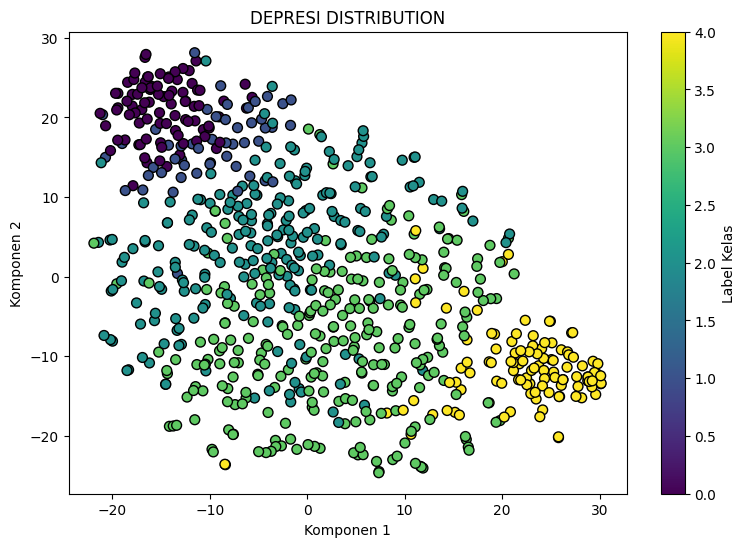

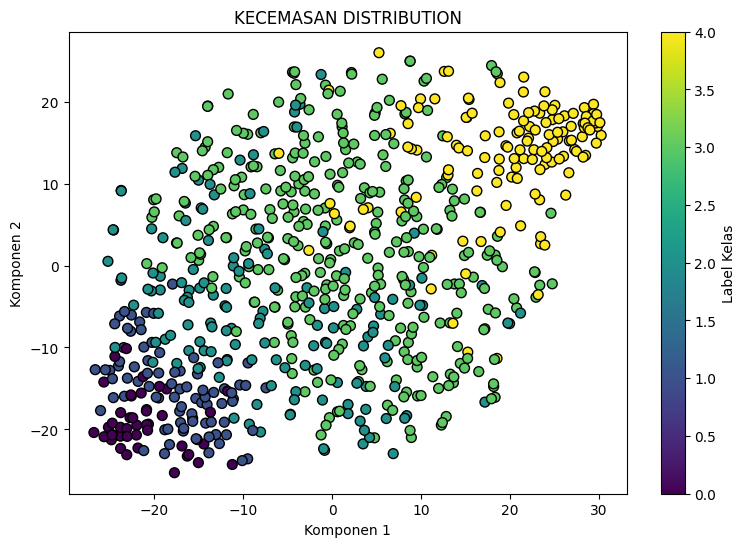

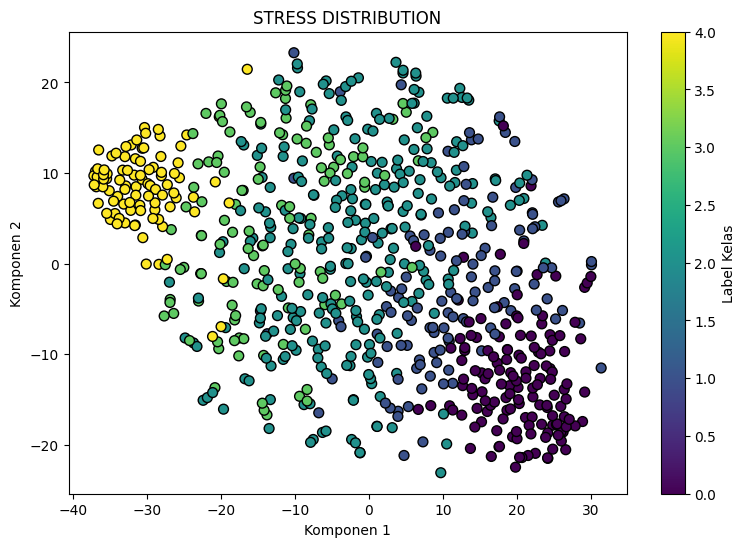

In [52]:
# USING TSNE TO SEE DISTRIBUTION FROM EACH OUTPUT USING SCATTER PLOT 2D
from sklearn.manifold import TSNE

tsne = TSNE(n_components= 2, random_state=12)

# DECLARE X VARIABLE AND FIT TO THEM
x_tsne_depresi = tsne.fit_transform(data_depresi.drop(columns=['skor_depresi','kategori_depresi']))  
x_tsne_kecemasan = tsne.fit_transform(data_kecemasan.drop(columns=['skor_kecemasan','kategori_kecemasan']))
x_tsne_stress = tsne.fit_transform(data_stress.drop(columns=['skor_stress', 'kategori_stress']))

# DECLARE Y VARIABLE
y_tsne_depresi = data_depresi['kategori_depresi']
y_tsne_kecemasan = data_kecemasan['kategori_kecemasan']
y_tsne_stress = data_stress['kategori_stress']

# DEPRESI
plt.figure(figsize=(9,6))
plt.scatter(x = x_tsne_depresi[:,0], y = x_tsne_depresi[:,1], c=y_tsne_depresi.to_numpy() , cmap='viridis',  edgecolors='k', s=50)
plt.colorbar(label='Label Kelas')
plt.title('DEPRESI DISTRIBUTION')
plt.xlabel('Komponen 1')
plt.ylabel('Komponen 2')
plt.show()

# KECEMASAN
plt.figure(figsize=(9,6))
plt.scatter(x = x_tsne_kecemasan[:,0], y = x_tsne_kecemasan[:,1], c=y_tsne_kecemasan.to_numpy() , cmap='viridis',  edgecolors='k', s=50)
plt.colorbar(label='Label Kelas')
plt.title('KECEMASAN DISTRIBUTION')
plt.xlabel('Komponen 1')
plt.ylabel('Komponen 2')
plt.show()

# STRESS
plt.figure(figsize=(9,6))
plt.scatter(x = x_tsne_stress[:,0], y = x_tsne_stress[:,1], c=y_tsne_stress.to_numpy() , cmap='viridis',  edgecolors='k', s=50)
plt.colorbar(label='Label Kelas')
plt.title('STRESS DISTRIBUTION')
plt.xlabel('Komponen 1')
plt.ylabel('Komponen 2')
plt.show()

In [11]:
# SPLIT DATASET

from sklearn.model_selection import train_test_split

#SPLIT DATASET FOR DEPRESI 
x_depresi = data_depresi.drop(columns=['skor_depresi','kategori_depresi'])
y_depresi = data_depresi['kategori_depresi']
x_train_depresi , x_test_depresi , y_train_depresi , y_test_depresi = train_test_split(x_depresi, y_depresi,test_size=0.2, random_state=12,shuffle=True)


# SPLIT DATASET FOR KECEMASAN
x_kecemasan = data_kecemasan.drop(columns=['skor_kecemasan','kategori_kecemasan'])
y_kecemasan = data_kecemasan['kategori_kecemasan']
x_train_kecemasan , x_test_kecemasan , y_train_kecemasan , y_test_kecemasan = train_test_split(x_kecemasan, y_kecemasan,test_size=0.2, random_state=12, shuffle=True)

# SPLIT DATASET FOR STRESS
x_stress = data_stress.drop(columns=['skor_stress','kategori_stress'])
y_stress = data_stress['kategori_stress']
x_train_stress , x_test_stress , y_train_stress , y_test_stress = train_test_split(x_stress, y_stress, test_size=0.2 , random_state=12, shuffle=True)


x_train_depresi.shape   , type(x_train_kecemasan)  , y_train_stress.shape  , type(y_test_depresi)

((588, 17), pandas.core.frame.DataFrame, (588,), pandas.core.series.Series)

In [12]:
# LOAD PREVIOUS MODEL

depresi_model = tf.keras.models.load_model(filepath='model_depresi_newdataset.h5')
kecemasan_model = tf.keras.models.load_model(filepath='model_kecemasan_newdataset.h5')
stress_model = tf.keras.models.load_model(filepath='model_stress_newdataset.h5')

depresi_model._name = 'depresi_model'
kecemasan_model._name = 'kecemasan_model'
stress_model._name = 'stress_model'

depresi_model , kecemasan_model , stress_model , depresi_model.input_shape , kecemasan_model.input_shape , stress_model.input_shape

(<keras.engine.sequential.Sequential at 0x215584f9460>,
 (None, 17),
 (None, 17),
 (None, 17))

In [13]:
# MERGE 3 MODEL INTO 1 MODEL

input_shape = depresi_model.input.shape[1:]  # Asumsi input untuk ketiga model sama
inputs = tf.keras.layers.Input(shape=input_shape)

depresi_output = depresi_model(inputs)
kecemasan_output = kecemasan_model(inputs)
stress_output = stress_model(inputs)

final_model = tf.keras.models.Model(inputs = inputs , outputs = [depresi_output,kecemasan_output,stress_output])
final_model  ,  final_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 17)]         0           []                               
                                                                                                  
 depresi_model (Sequential)     (None, 5)            30035       ['input_1[0][0]']                
                                                                                                  
 kecemasan_model (Sequential)   (None, 5)            30035       ['input_1[0][0]']                
                                                                                                  
 stress_model (Sequential)      (None, 5)            30035       ['input_1[0][0]']                
                                                                                              

(<keras.engine.functional.Functional at 0x2155ebcd970>, None)

In [14]:
final_model.compile(optimizer='adam', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

5/5 [==============================] - 0s 5ms/step


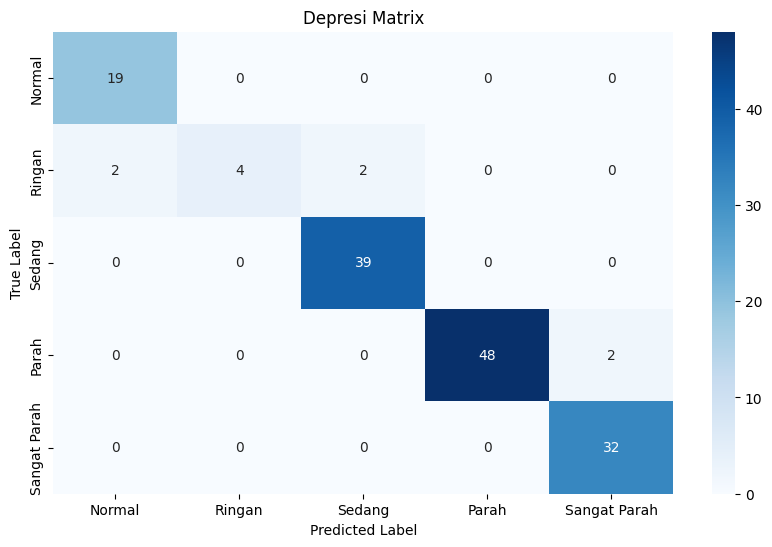

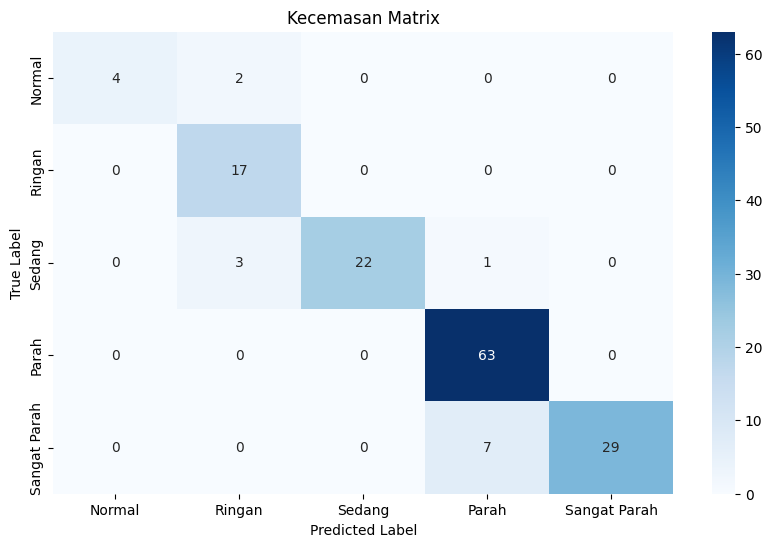

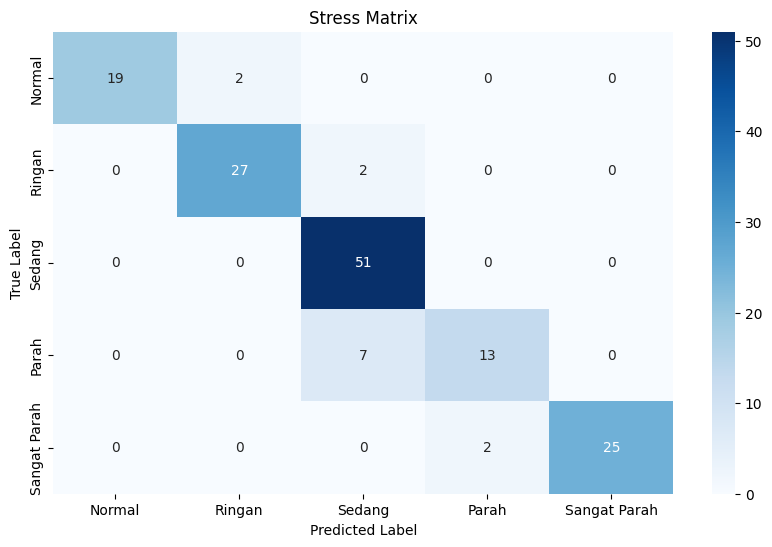

In [ ]:
# EVALUATE THE OUTPUT AND CREATE CONFUSION MATRIX 

from sklearn.metrics import confusion_matrix

y_pred1 = final_model.predict(x_test_depresi)  # PREDICT FOR DEPRESI
y_pred2 = final_model.predict(x_test_kecemasan) # PREDICT FOR KECEMASAN
y_pred3 = final_model.predict(x_test_stress)   # PREDICT FOR STRESS


y_pred_depresi = np.argmax(a = y_pred1[0], axis= 1)
y_pred_kecemasan = np.argmax(a = y_pred2[1], axis =1)
y_pred_stress = np.argmax(a = y_pred3[2], axis=1)

cm_depresi = confusion_matrix(y_test_depresi , y_pred_depresi)
cm_kecemasan = confusion_matrix(y_test_kecemasan, y_pred_kecemasan)
cm_stress = confusion_matrix(y_test_stress , y_pred_stress)

# PLOT CONFUSION MATRIX USING HEATMAP
def plot_confusion_matrix(confusion_matrix, title, labels =None):
    plt.figure(figsize=(10,6))
    sns.heatmap(data=confusion_matrix, annot=True, cmap='Blues', fmt='.2g', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

labels= ['Normal','Ringan','Sedang','Parah','Sangat Parah']
plot_confusion_matrix(cm_depresi, 'Depresi Matrix', labels )
plot_confusion_matrix(cm_kecemasan, 'Kecemasan Matrix', labels)
plot_confusion_matrix(cm_stress, 'Stress Matrix', labels)

In [25]:
# ACCURACY FOR EACH OUTPUT

accuracy_depresi = np.trace(cm_depresi) / np.sum(cm_depresi)
accuracy_kecemasan = np.trace(cm_kecemasan) / np.sum(cm_kecemasan)
accuracy_stress = np.trace(cm_stress) / np.sum(cm_stress)

accuracy_total = (accuracy_depresi + accuracy_kecemasan + accuracy_stress) / 3

print(f"Akurasi untuk Depresi: {accuracy_depresi * 100:.2f}%")
print(f"Akurasi untuk Kecemasan: {accuracy_kecemasan * 100:.2f}%")
print(f"Akurasi untuk Stress: {accuracy_stress * 100:.2f}%")
print(f'Akurasi Total : {accuracy_total * 100:.2f}%')

Akurasi untuk Depresi: 95.95%
Akurasi untuk Kecemasan: 91.22%
Akurasi untuk Stress: 91.22%
Akurasi Total : 92.79%


In [26]:
# SAVE MODEL 
final_model.save('merge_model.h5')